# Sea Level Predictor

Analysis of a dataset of the global average sea-level change since 1880. Using data to predict sea-level change through the year 2050.

### Import of libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import stats

### Creating a data frame from data.csv

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


## CSIRO Adjusted Sea Level

In [13]:
df['CSIRO Adjusted Sea Level'].isnull().value_counts()

False    134
Name: CSIRO Adjusted Sea Level, dtype: int64

In [16]:
df['CSIRO Adjusted Sea Level'].describe()

count    134.000000
mean       3.650341
std        2.485692
min       -0.440945
25%        1.632874
50%        3.312992
75%        5.587598
max        9.326772
Name: CSIRO Adjusted Sea Level, dtype: float64

In the dataset there are no missing values from CSIRO Adjusted Sea Level in the years 1880 - 2013.

### Creating scatter plot

In [73]:
def scatter_csiro():
    fig, ax = plt.subplots(figsize=(20,15))

    x = df['Year']
    y = df['CSIRO Adjusted Sea Level']

    fig = plt.scatter(x, y, label='Original data')
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Sea Level (inches)', fontsize=20)
    plt.title('Rise in Sea Level (CSIRO)', fontsize=25)
    plt.axis(xmin=1850, xmax=2075, ymin=-1, ymax=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.legend(loc=2, prop={'size': 20})
    return plt.gca()
    

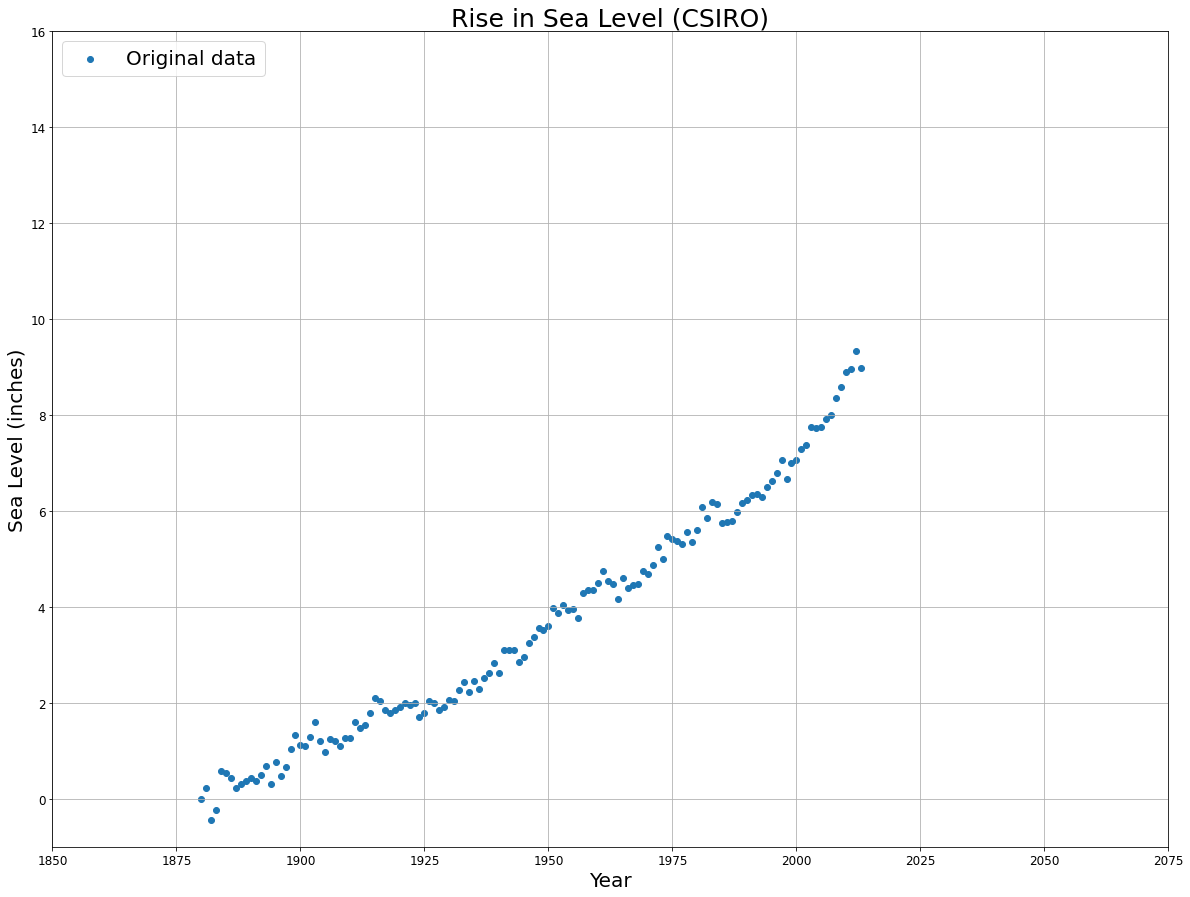

In [88]:
scatter_csiro()

### Creating the best fitting line on the data set

Plotting the line of best fit over the top of the scatter plot. The line goes through the year 2050 to predict the sea level rise in 2050.

In [84]:
def best_fit_line_csiro():
    x = df['Year']
    y = df['CSIRO Adjusted Sea Level']
    
    fig = scatter_csiro()
    years_extended = np.arange(1880, 2051, 1)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = [slope*xi + intercept for xi in years_extended]
    plt.plot(years_extended, line, color = 'green', label="Best fitting line (1880-2050)", linewidth=2)
    plt.legend(loc=2, prop={'size': 20})
    
    prediction = slope * 2050 + intercept
    prediction = str(round(prediction, 6))
    print('Predicted adjusted sea level in 2050 from data since 1880 is ' + prediction)
    
    return plt.gca()

Predicted adjusted sea level in 2050 from data since 1880 is 10.175455


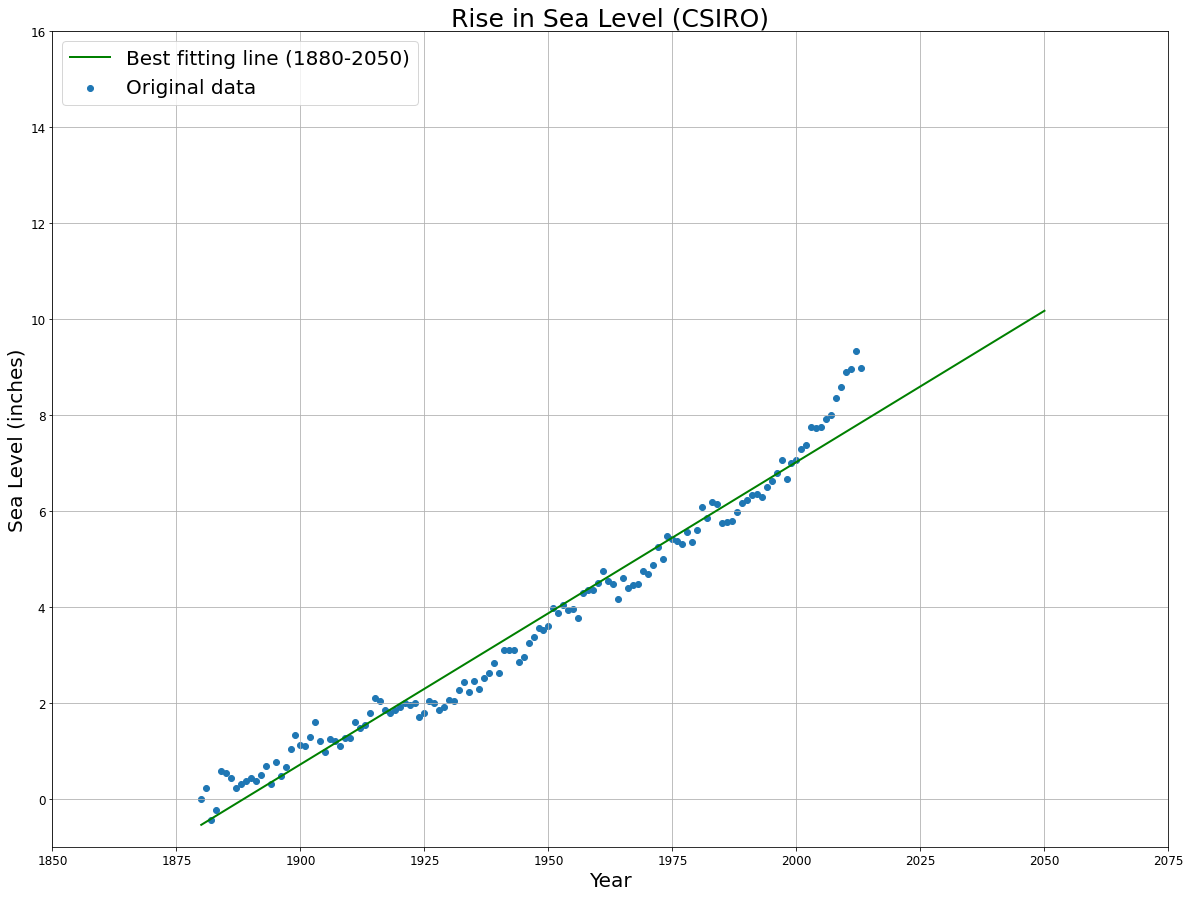

In [85]:
best_fit_line_csiro()

According to the linear regression, the adjusted sea level in 2050 will be 10.175455 inches. In the chart, we can observe that the sea level is increasingly higher than the best fitting line since 2000.

### Creating the best fitting line 2000-2050

Plotting a new line of best fit just using the data from the year 2000 through the most recent year in the dataset.
The line also goes through the year 2050 to predict the sea level rise in 2050 if the rate of rising continues as it has since the year 2000.

In [86]:
def best_fit_line_csiro_2000():
    fig = best_fit_line_csiro()
    mask = df['Year'] >= 2000
    df_sline = df[mask]
    
    x = df_sline['Year']
    y = df_sline['CSIRO Adjusted Sea Level']
    years_extended_s = np.arange(2000, 2051, 1)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = [slope*xi + intercept for xi in years_extended_s]
    plt.plot(years_extended_s, line, color = 'red', label="Best fitting line (2000-2050)", linewidth=2)
    plt.legend(loc=2, prop={'size': 20})
    
    prediction = slope * 2050 + intercept
    prediction = str(round(prediction, 6))
    print('Predicted adjusted sea level in 2050 from data since 2000 is ' + prediction)
    
    return plt.gca()

    

Predicted adjusted sea level in 2050 from data since 1880 is 10.175455
Predicted adjusted sea level in 2050 from data since 2000 is 15.382444


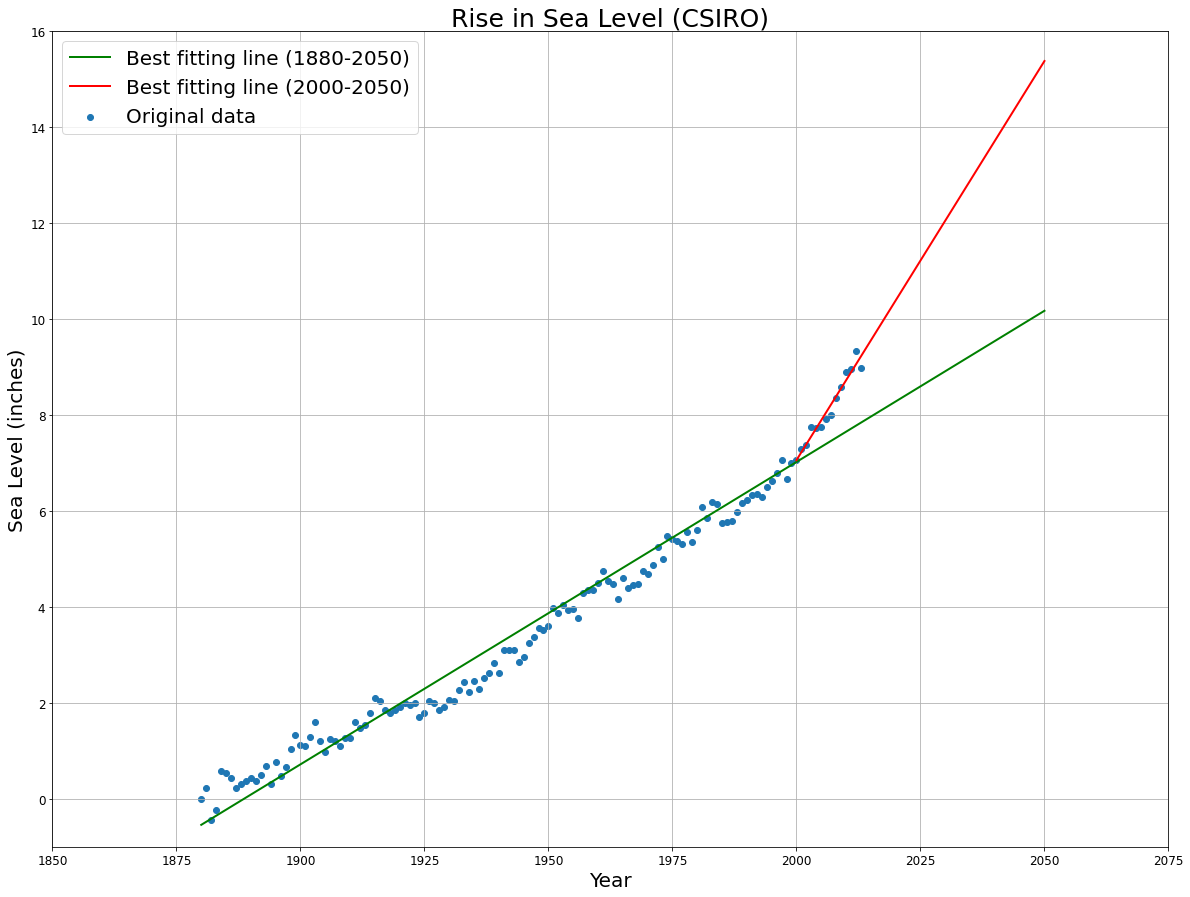

In [87]:
best_fit_line_csiro_2000()

In [89]:
proc = (15.382444 - 10.175455)/10.175455*100
round(proc, 2)

51.17

According to the linear regression calculated from dataset values since 2000, the adjusted sea level in 2050 will be 15.382444 inches. The new prediction is 51.17% higher than the one using the whole data provided by CSIRO. The data indicates that the rate of rising has increased since 2000

### NOAA Adjusted Sea Level

In [91]:
df['NOAA Adjusted Sea Level'].isnull().value_counts()

True     113
False     21
Name: NOAA Adjusted Sea Level, dtype: int64

In [102]:
mask = df['NOAA Adjusted Sea Level'].notnull()
df_noaa = df[mask].reset_index()
df_noaa = df_noaa.drop(['index'], axis=1)

In [103]:
df_noaa

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1993,6.291339,6.027559,6.555118,6.297493
1,1994,6.500000,6.236220,6.763780,6.310934
2,1995,6.618110,6.354331,6.881890,6.452569
3,1996,6.787402,6.523622,7.051181,6.627631
4,1997,7.066929,6.803150,7.330709,6.733920
5,1998,6.665354,6.393701,6.937008,6.865806
6,1999,7.011811,6.736220,7.287402,6.848690
7,2000,7.062992,6.791339,7.334646,6.920582
8,2001,7.287402,7.019685,7.555118,7.087460
9,2002,7.381890,7.110236,7.653543,7.319698


NOAA Adjusted Sea Level values are available from 1993.

### Creating scatter plot and best fitting line

Plotting the line of best fit over the top of the scatter plot. The line goes through the year 2050 to predict the sea level rise in 2050.

In [144]:
def noaa():
    fig, ax = plt.subplots(figsize=(20,15))

    x = df_noaa['Year']
    y = df_noaa['NOAA Adjusted Sea Level']

    fig = plt.scatter(x, y, label='NOAA data')
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Sea Level (inches)', fontsize=20)
    plt.title('Rise in Sea Level (NOAA)', fontsize=25)
    plt.axis(xmin=1990, xmax=2055, ymin=4, ymax=16)
    
    years_extended = np.arange(1993, 2051, 1)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = [slope*xi + intercept for xi in years_extended]
    plt.plot(years_extended, line, color = 'green', label="Best fitting line NOAA", linewidth=2)
    plt.legend(loc=2, prop={'size': 20})
    
    prediction = slope * 2050 + intercept
    prediction = str(round(prediction, 6))
    print('Predicted adjusted sea level in 2050 from NOAA data since 1993 is ' + prediction)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.legend(loc=2, prop={'size': 20})
    return plt.gca()

Predicted adjusted sea level in 2050 from NOAA data since 1993 is 12.564705


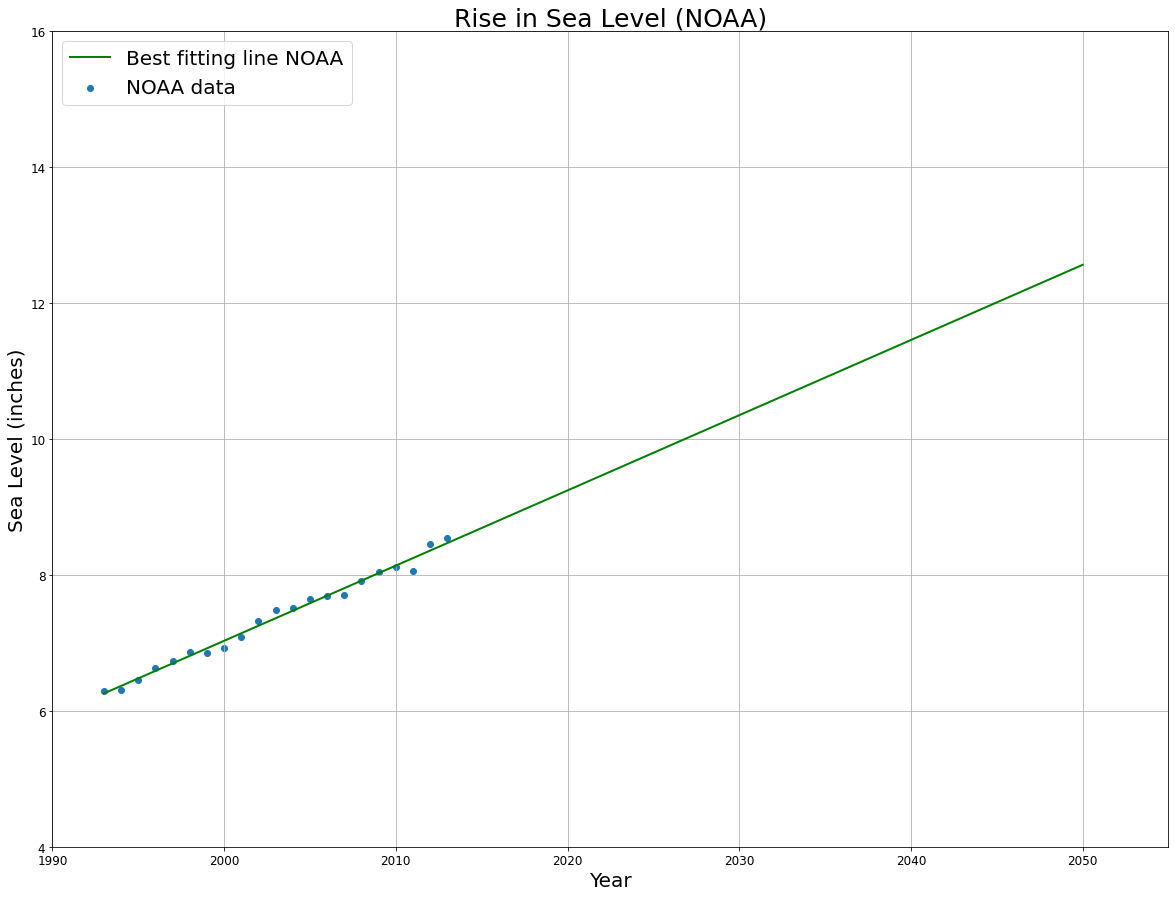

In [145]:
noaa()

Predicted by linear regression, the adjusted sea level in 2050 will be 12.564705 inches. The value is in between the values calculated from the CSIRO dataset containing data from years 1880-2013 (10.175455 inches) and the CSIRO dataset containing data from years 2000-2013 (15.382444 inches).

### Compering NOAA and CSIRO data since 1993

Plotting the line of best fit over the top of the scatter plot. The line goes through the year 2050 to predict the sea level rise in 2050.

In [150]:
def graph():
    fig = noaa()
    
    mask = df['Year'] >= 1993
    df_sline = df[mask]
    
    x = df_sline['Year']
    y = df_sline['CSIRO Adjusted Sea Level']
    
    plt.scatter(x, y, label='CSIRO data', color = 'black')
    
    years_extended_s = np.arange(1993, 2051, 1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = [slope*xi + intercept for xi in years_extended_s]
    plt.plot(years_extended_s, line, color = 'red', label="Best fitting line CSIRO", linewidth=2)
    
    plt.legend(loc=2, prop={'size': 20})
    
    prediction = slope * 2050 + intercept
    prediction = str(round(prediction, 6))
    print('Predicted adjusted sea level in 2050 from CSIRO data since 1993 is ' + prediction)
    
    return plt.gca()

Predicted adjusted sea level in 2050 from NOAA data since 1993 is 12.564705
Predicted adjusted sea level in 2050 from CSIRO data since 1993 is 14.452396


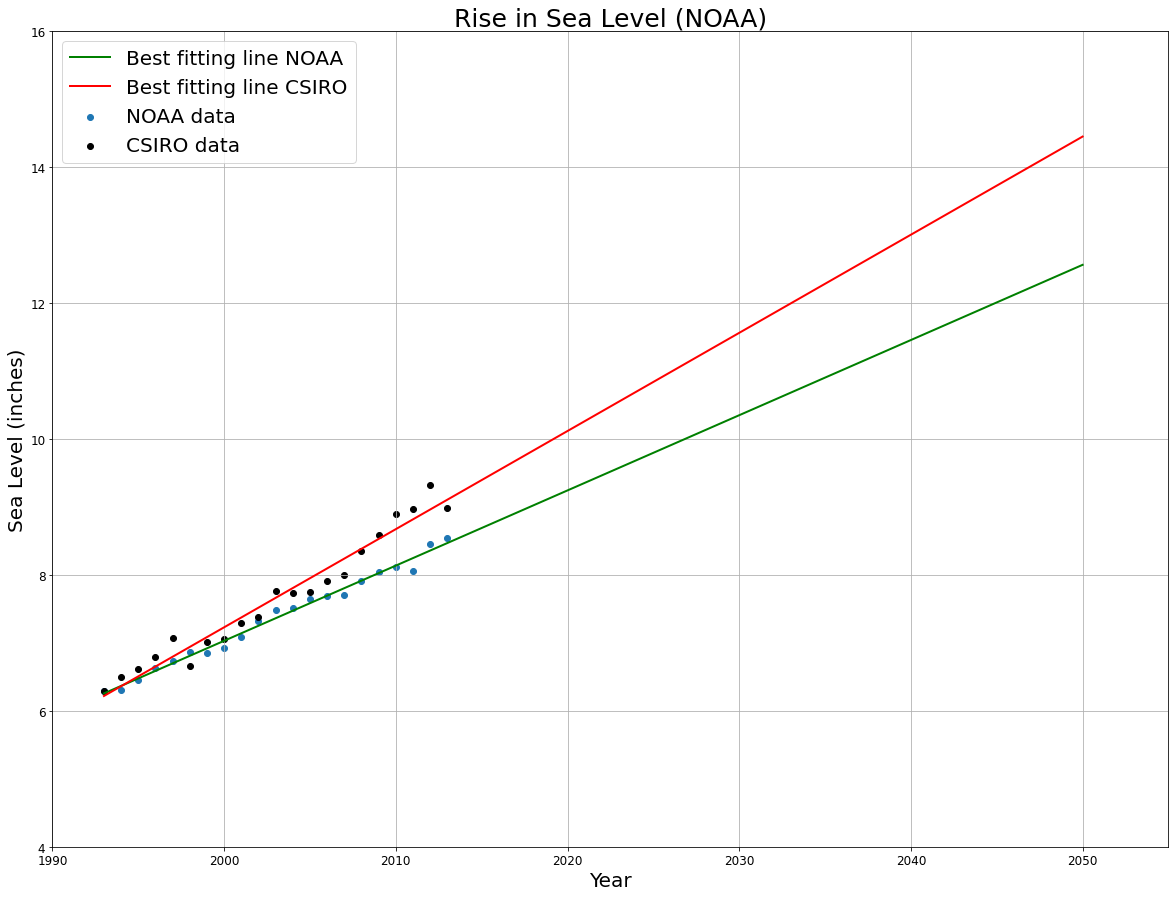

In [151]:
graph()

Comparing the data from the same years, we can see that the values obtained by CSIRO are higher, which translates into a higher adjusted sea-level forecast of 14.452396 inches. Data collected by NOAA suggests a result of 12,564705 inches, but this figure is higher than the predicted adjusted sea level from CSIRO data for 1880-2013 (10.175455 inches). This confirms the conclusion from the comparison of the prediction results from the linear regression of CSIRO data from 1880-2013 to 2000-2013. since 2000 can be observed that the rate of rise has increased.